In [1]:
import src.turing_causal_impact.queries_sales as queries_sales
import src.turing_causal_impact.causal_inference as causal_inference
# import causal_inference

import importlib
import pandas as pd
import seaborn as sns
import os
import datetime as dt
import numpy as np
import json

In [6]:
# scenarios_files = ['./scenarios/Genmed/BRAZIL/brazil_puran.json']
scenarios_files = ['./scenarios/Genmed/BRAZIL/brazil_zinpass.json']
# scenarios_files = ['./scenarios/Genmed/FRANCE/france_toujeo.json']
# scenarios_files = ['./scenarios/Genmed/FRANCE/france_toujeo_front_runners.json']
# scenarios_files = ['./scenarios/Genmed/FRANCE/france_toujeo.json', './scenarios/Genmed/FRANCE/france_toujeo_front_runners.json']
# scenarios_files = ['./scenarios/Genmed/GERMANY/germany_toujeo.json']
# scenarios_files = ['./scenarios/Genmed/SPAIN/spain_toujeo.json']
# scenarios_files = ['./scenarios/Genmed/JAPAN/japan_toujeo.json']

In [7]:

scenarios = []
# with open("scenarios/us_multaq.json") as f:
#     scenarios.append(json.loads(f.read()))
# with open("scenarios/us_multaq_2.json") as f:
#     scenarios.append(json.loads(f.read()))
for s_file in scenarios_files:
    with open(s_file) as f:
        scenarios.append(json.loads(f.read()))

In [8]:
scenarios

[{'name': 'brazil-zinpass',
  'country': 'BRAZIL',
  'brands': ['TREZETE', 'COLEDUE R', 'PLENANCE EZE', 'ZINPASS EZE'],
  'target_brand': 'ZINPASS EZE',
  'metric': 'SUM(QUANTITY)',
  'cutover': '2023-11-01',
  'frequency': 'monthly'}]

# Get data

In [302]:
queries_sales = importlib.reload(queries_sales)

In [303]:
# queries_sales.get_all_sales_data([{'country':'BRAZIL', 'brands':['%PURAN%']}, {'country':'US', 'brands':['%PURAN%']}], '2024-01-01')
queries_sales.get_all_sales_data(scenarios, '2023-01-01')

amer False emea True
Initiating login request with your identity provider. A browser window should have opened for you to complete the login. If you can't see it, check existing browser windows, or your OS settings. Press CTRL+C to abort and try again...
Going to open: https://login.microsoftonline.com/aca3c8d6-aa71-4e1a-a10e-03572fc58c0b/saml2?SAMLRequest=lZJdb9owFIb%2FSuRdJ7ZDUsACKgbqxtqtCOiYdjMZ54Ra9Qeznabdr58JReouWml3ifO8zmO%2FZ3T5pFXyCM5La8aIZgQlYIStpNmP0d3mKh2gxAduKq6sgTF6Bo8uJyPPtTqwaRPuzQp%2BN%2BBDEjcynnUfxqhxhlnupWeGa%2FAsCLaefr1heUbYwdlghVXoVeT9BPceXIiG50jlZdS7D%2BHAMG7bNmt7mXV7nBNCMBniSB2RD2f%2BKZ7pDZ5iUhz5SER8%2BeL2UZrTFbyntTtBnn3ebJbp8na9Qcn0rDqzxjca3BrcoxRwt7o5Cfho4LmxtUxBA%2F8lrNaZN7atFX%2BA%2BHZoQtw0i0%2B4hgoru5fx3Iv5GB0eZPUjuD75lJe79bbMm8F8mNcz%2BDJbWfgzHG6H4VpfFLdiy68LIVDy%2FVxsfix24X0DC3OsM8QlkhcpuUhpvqEFKynr0aws%2Bz9RMo91SsNDlzw7dx6ZlsJZb%2BtgjZIGOksueE8MqouU8z5NC6A85ZRASnplP69FORBkh48l5%2Bg0OKwTcZP%2FvI4Rfh1%2BGcFvsZXFfGmVFM%2FJlXWah7dLoxntVmSV1h3KQHOpplXlwPtYnlK2n

# Causal impact


## installation if need be

In [266]:
causal_inference = importlib.reload(causal_inference)

Scenario: brazil-zinpass
###############################



['2022-05-01', '2023-11-01'] ['2023-12-01', '2024-04-01']



/Users/I0517417/Documents/analyses/oneai-com-turing-causal_inference/.env/lib/python3.11/site-packages/causalimpact/data.py:263: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  if not data.applymap(np.isreal).values.all():
/Users/I0517417/Documents/analyses/oneai-com-turing-causal_inference/.env/lib/python3.11/site-packages/tensorflow_probability/python/mcmc/sample.py:339: UserWarning: Tracing all kernel results by default is deprecated. Set the `trace_fn` argument to None (the future default value) or an explicit callback that traces the values you are interested in.
  warnings.warn('Tracing all kernel results by default is deprecated. Set '


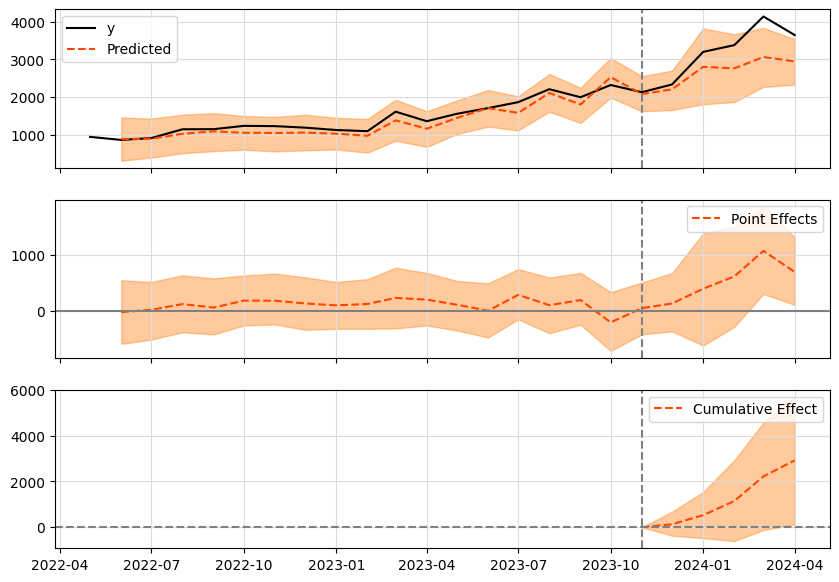

Posterior Inference {Causal Impact}
                          Average            Cumulative
Actual                    3339.6             16698.0
Prediction (s.d.)         2755.75 (268.34)   13778.77 (1341.71)
95% CI                    [2240.92, 3292.81] [11204.61, 16464.03]

Absolute effect (s.d.)    583.85 (268.34)    2919.23 (1341.71)
95% CI                    [46.79, 1098.68]   [233.97, 5493.39]

Relative effect (s.d.)    21.19% (9.74%)     21.19% (9.74%)
95% CI                    [1.7%, 39.87%]     [1.7%, 39.87%]

Posterior tail-area probability p: 0.01
Posterior prob. of a causal effect: 98.8%

For more details run the command: print(impact.summary('report'))


In [10]:
for scenario in scenarios:
    print(f"Scenario: {scenario['name']}")
    print("###############################")
    print()

    #load data
    df = pd.read_parquet(f"data/{scenario['name']}.parquet")
    # {'fit_method': 'hmc'}
    impact = causal_inference.provide_analyse(scenario, df, model_args={'fit_method': 'hmc'})
    
    impact.plot()
    print(impact.summary())

In [253]:
df[df['SUM(SALES_AMOUNT)'].isna()]

,COUNTRY,SALES_DT,LOCAL_BRAND_NAME,SUM(QUANTITY),SUM(SALES_AMOUNT)


In [249]:
df.columns

Index(['COUNTRY', 'SALES_DT', 'LOCAL_BRAND_NAME', 'SUM(QUANTITY)',
       'SUM(SALES_AMOUNT)'],
      dtype='object')

In [ ]:
print(impact.summary('report'))

Analysis report {CausalImpact}


During the post-intervention period, the response variable had
an average value of approx. 9119.0. In the absence of an
intervention, we would have expected an average response of 9266.08.
The 95% interval of this counterfactual prediction is [9063.62, 9445.84].
Subtracting this prediction from the observed response yields
an estimate of the causal effect the intervention had on the
response variable. This effect is -147.08 with a 95% interval of
[-326.84, 55.38]. For a discussion of the significance of this effect,
see below.


Summing up the individual data points during the post-intervention
period (which can only sometimes be meaningfully interpreted), the
response variable had an overall value of 182380.0.
Had the intervention not taken place, we would have expected
a sum of 185321.52. The 95% interval of this prediction is [181272.36, 188916.71].


The above results are given in terms of absolute numbers. In relative
terms, the response variable s

In [163]:
df.dtypes

COUNTRY               object
SALES_DT              object
BRAND_ID               int32
LOCAL_BRAND_NAME      object
GLOBAL_BRAND_NAME     object
SUM(QUANTITY_SOLD)    object
SUM(SALES_AMOUNT)     object
SUM(UNITS_SOLD)       object
SUM(RX_COUNT)          int64
SUM(RX_NUM)            int64
dtype: object

In [305]:
brands = scenario["brands"].copy()
brands.remove(scenario["target_brand"])
new_columns = [scenario["target_brand"]] + brands
metric = "SUM(QUANTITY)"
data = df[["SALES_DT", "LOCAL_BRAND_NAME", metric]]
data["SALES_DT"] = pd.to_datetime(data["SALES_DT"])
data[metric] = data[metric].fillna(0) # addedd for quality purpose
data[metric] = data[metric].astype(np.int64)

/var/folders/g5/tv7p4_cd7wddlhklqh9f7fww0000gp/T/ipykernel_94934/4020196989.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["SALES_DT"] = pd.to_datetime(data["SALES_DT"])
/var/folders/g5/tv7p4_cd7wddlhklqh9f7fww0000gp/T/ipykernel_94934/4020196989.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[metric] = data[metric].fillna(0) # addedd for quality purpose
/var/folders/g5/tv7p4_cd7wddlhklqh9f7fww0000gp/T/ipykernel_94934/4020196989.py:8: SettingWithCopyWarning: 
A value is trying to be set on

In [306]:
data = data.groupby(["SALES_DT", "LOCAL_BRAND_NAME"]).sum().reset_index()
data = data.pivot(
    index="SALES_DT", columns="LOCAL_BRAND_NAME", values=metric
)
data = data.reindex(columns=new_columns)

In [307]:
data['SALES_DT'].max()

KeyError: 'SALES_DT'

In [260]:
data[data['SUM(QUANTITY)'].isna()]

,SALES_DT,LOCAL_BRAND_NAME,SUM(QUANTITY)


In [264]:
data.iloc[:, 1:].isna().values.any()

True

In [308]:
data

LOCAL_BRAND_NAME,ZINPASS EZE,TREZETE,COLEDUE R,PLENANCE EZE,RUNNER EZE
SALES_DT,,,,,
2022-05-01,943.0,8889.0,NaN,2090.0,NaN
2022-06-01,862.0,8331.0,NaN,2117.0,NaN
2022-07-01,912.0,8544.0,NaN,2189.0,NaN
2022-08-01,1145.0,10125.0,NaN,2176.0,NaN
2022-09-01,1148.0,10605.0,NaN,2124.0,NaN
2022-10-01,1235.0,9897.0,NaN,2271.0,NaN
2022-11-01,1228.0,9567.0,NaN,2059.0,NaN
2022-12-01,1188.0,9456.0,NaN,1867.0,NaN
2023-01-01,1125.0,8784.0,NaN,2066.0,NaN
